In [13]:
#importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


#carregar os datasets

try: 
    df_ofense = pd.read_excel('Ofense.xlsx',sheet_name='Chamados')
    df_chamados = pd.read_csv('chamados.csv',sep=';')
except FileNotFoundError:
    print("Certifique que o arquivo está na mesma pasta deste script!")
    exit()


print(df_ofense.head())
print("****************************************")
print(df_chamados.head())

   Codigo   Abertura Origem  Codigo_Usuario       Tipo_Incidente  Observação
0    2001 2023-01-14  Email              44  Manutenção em Grupo         NaN
1    2002 2023-01-15  Email              33  Manutenção em Grupo         NaN
2    2003 2023-01-17  Email               6  Manutenção em Grupo         NaN
3    2004 2023-01-16  Email               9  Manutenção em Grupo         NaN
4    2005 2023-01-22    ISM              19  Manutenção em Grupo         NaN
****************************************
   id_chamado  id_usuario     data_abertura         tipo_incidente
0        1001           4  10/01/2023 09:30  Acesso Nao Autorizado
1        1002          12  10/01/2023 10:15   Tentativa de Invasao
2        1003          17  11/01/2023 11:00               Phishing
3        1004          23  11/01/2023 14:45                Malware
4        1005           4  12/01/2023 08:00  Acesso Nao Autorizado


In [14]:
print("Ler a estrutura dos campos")
print("Fonte: Chamados")
print(df_chamados.dtypes)
print("***************************")
print("Fonte: Ofense")
print(df_ofense.dtypes)


#Renomear os Campos da Fonte Chamados
df_chamados.columns=['Codigo','Codigo_Usuario','Abertura','Tipo_Incidente']
print("**************Resultado após a alteração de nomenclatura - Fonte: Chamados")
print(df_chamados.dtypes)

Ler a estrutura dos campos
Fonte: Chamados
id_chamado         int64
id_usuario         int64
data_abertura     object
tipo_incidente    object
dtype: object
***************************
Fonte: Ofense
Codigo                     int64
Abertura          datetime64[ns]
Origem                    object
Codigo_Usuario             int64
Tipo_Incidente            object
Observação               float64
dtype: object
**************Resultado após a alteração de nomenclatura - Fonte: Chamados
Codigo             int64
Codigo_Usuario     int64
Abertura          object
Tipo_Incidente    object
dtype: object


In [15]:
df_chamados['Abertura'] = pd.to_datetime(df_chamados['Abertura'], format='%d/%m/%Y %H:%M')

print(df_chamados.dtypes)

#print(df_chamados.head())

df_quinzena = df_chamados[
    (df_chamados['Abertura'].dt.month == 1) &
    (df_chamados['Abertura'].dt.day <= 15)                         
]
print(df_quinzena.head(10))

Codigo                     int64
Codigo_Usuario             int64
Abertura          datetime64[ns]
Tipo_Incidente            object
dtype: object
   Codigo  Codigo_Usuario            Abertura         Tipo_Incidente
0    1001               4 2023-01-10 09:30:00  Acesso Nao Autorizado
1    1002              12 2023-01-10 10:15:00   Tentativa de Invasao
2    1003              17 2023-01-11 11:00:00               Phishing
3    1004              23 2023-01-11 14:45:00                Malware
4    1005               4 2023-01-12 08:00:00  Acesso Nao Autorizado
5    1006               5 2023-01-12 09:10:00   Tentativa de Invasao
6    1007              10 2023-01-12 12:30:00               Phishing
7    1008              12 2023-01-13 15:20:00                Malware
8    1009              14 2023-01-13 16:55:00  Acesso Nao Autorizado
9    1010               2 2023-01-14 09:00:00   Tentativa de Invasao


In [16]:
# Integrar os dados em uma única fonte

df_consolidado = pd.merge(
    df_chamados,
    df_ofense,
    on='Abertura',
    how='outer',
    suffixes=('_chamados','_ofense')
)

print(df_consolidado.head(10))

#exportar os dados
df_consolidado.to_excel('Fonte Consolidada.xlsx',index=False)

print("Dados Exportados com Sucesso!")

   Codigo_chamados  Codigo_Usuario_chamados   Abertura  \
0              NaN                      NaN 2023-01-01   
1              NaN                      NaN 2023-01-01   
2              NaN                      NaN 2023-01-01   
3              NaN                      NaN 2023-01-01   
4              NaN                      NaN 2023-01-01   
5              NaN                      NaN 2023-01-01   
6              NaN                      NaN 2023-01-01   
7              NaN                      NaN 2023-01-01   
8              NaN                      NaN 2023-01-01   
9              NaN                      NaN 2023-01-01   

  Tipo_Incidente_chamados  Codigo_ofense   Origem  Codigo_Usuario_ofense  \
0                     NaN         2016.0    Email                   21.0   
1                     NaN         2027.0  sistema                   45.0   
2                     NaN         2057.0  sistema                   22.0   
3                     NaN         2063.0  sistema        

In [17]:
df_consolidado['Codigo'] = df_consolidado['Codigo_ofense'].fillna(df_consolidado['Codigo_chamados'])

df_consolidado['Tipo_Incidente'] = df_consolidado['Tipo_Incidente_ofense'].fillna(df_consolidado['Tipo_Incidente_chamados'])
df_consolidado['Codigo_Usuario']=df_consolidado['Codigo_Usuario_ofense'].fillna(df_consolidado['Codigo_Usuario_chamados'])

df_consolidado = df_consolidado.drop(columns=[
    'Codigo_ofense','Codigo_chamados',
    'Tipo_Incidente_ofense','Tipo_Incidente_chamados',
    'Codigo_Usuario_ofense','Codigo_Usuario_chamados'
])

print(df_consolidado.head())
df_consolidado.to_excel('Chamados_Consolidados.xlsx',index=False)



    Abertura   Origem  Observação  Codigo       Tipo_Incidente  Codigo_Usuario
0 2023-01-01    Email         NaN  2016.0          Desbloqueio            21.0
1 2023-01-01  sistema         NaN  2027.0  Manutenção em Grupo            45.0
2 2023-01-01  sistema         NaN  2057.0                Outro            22.0
3 2023-01-01  sistema         NaN  2063.0     Permissionamento             7.0
4 2023-01-01    Email         NaN  2079.0          Desbloqueio            15.0


In [18]:

df_consolidado["Origem"] = df_consolidado["Origem"].fillna("sistema")
df_consolidado.to_excel('Chamados_Consolidados.xlsx',index=False)

In [22]:
chamados_por_origem = df_consolidado['Origem'].value_counts()
print("*********Chamados por Origem*********")
print(chamados_por_origem)


chamados_por_usuario   =df_consolidado['Codigo_Usuario'].value_counts()
print("*********Chamados por Usuário*********")
print(chamados_por_usuario)

*********Chamados por Origem*********
Origem
sistema    289
Email      256
ISM          4
Name: count, dtype: int64
*********Chamados por Usuário*********
Codigo_Usuario
4.0     26
11.0    19
42.0    18
21.0    16
50.0    16
15.0    15
6.0     14
45.0    14
19.0    13
33.0    13
34.0    13
16.0    12
23.0    12
40.0    12
41.0    12
27.0    12
22.0    12
36.0    12
24.0    11
39.0    11
17.0    11
8.0     11
32.0    11
7.0     11
20.0    11
12.0    11
44.0    10
29.0    10
2.0     10
3.0     10
30.0    10
5.0     10
38.0    10
35.0     9
1.0      9
37.0     9
47.0     9
14.0     9
46.0     8
48.0     8
43.0     8
26.0     8
31.0     8
10.0     8
13.0     7
28.0     7
18.0     6
25.0     6
9.0      6
49.0     5
Name: count, dtype: int64


In [34]:
usuarios = [4.0,11.0,42.0]
df_usuarios_selecionados = df_consolidado[df_consolidado['Codigo_Usuario'].isin(usuarios)]
print(df_usuarios_selecionados.head())

df_usuarios_selecionados.to_excel('Usuarios_Selecionados.xlsx',index=False)

     Abertura   Origem  Observação  Codigo       Tipo_Incidente  \
33 2023-01-03    Email         NaN  2379.0          Desbloqueio   
38 2023-01-04    Email         NaN  2092.0                Outro   
54 2023-01-05  sistema         NaN  2144.0  Manutenção em Grupo   
57 2023-01-05    Email         NaN  2259.0     Permissionamento   
64 2023-01-05  sistema         NaN  2393.0          Desbloqueio   

    Codigo_Usuario  
33            42.0  
38            42.0  
54            11.0  
57            11.0  
64            42.0  


In [41]:
# Crie o dicionário de mapeamento
mapa_categoria = {
    'Acesso Nao Autorizado': 'Acesso Indevido',
    'Tentativa de Invasao': 'Ataque Cibernetico',
    'Phishing': 'Engenharia Social',
    'Malware': 'Software Malicioso',
    'Manutenção em Grupo': 'Inclusao de Acesso',
    'Desbloqueio': 'Inclusao de Acesso',
    'Outro': 'Outro',
    'Permissionamento': 'Inclusao de Acesso'
}
# Crie a nova coluna 'Categoria' no seu DataFrame usando o método map
df_consolidado['Categoria'] = df_consolidado['Tipo_Incidente'].map(mapa_categoria)

# Reordenar as colunas para melhor visualização (opcional)
colunas_ordenadas = [
    'Abertura',
    'Codigo',
    'Origem',
    'Codigo_Usuario',
    'Tipo_Incidente',
    'Categoria'
]
df_consolidado = df_consolidado.reindex(columns=colunas_ordenadas)

print(df_consolidado.head())

# Salvar o resultado final em um novo arquivo Excel
df_consolidado.to_excel('Chamados_Consolidados.xlsx', index=False)

    Abertura  Codigo   Origem  Codigo_Usuario       Tipo_Incidente  \
0 2023-01-01  2016.0    Email            21.0          Desbloqueio   
1 2023-01-01  2027.0  sistema            45.0  Manutenção em Grupo   
2 2023-01-01  2057.0  sistema            22.0                Outro   
3 2023-01-01  2063.0  sistema             7.0     Permissionamento   
4 2023-01-01  2079.0    Email            15.0          Desbloqueio   

            Categoria  
0  Inclusao de Acesso  
1  Inclusao de Acesso  
2               Outro  
3  Inclusao de Acesso  
4  Inclusao de Acesso  


In [42]:
# 1. Abrir o arquivo logs.csv
df_logs = pd.read_csv('logs.csv',sep=";")


# 2. Criar um dicionário de mapeamento para as alterações
mapeamento = {
    'Br': 'Brasil',
    'Estados Unidos': 'EUA'
}

# 3. Alterar os valores na coluna 'pais_origem'
df_logs['pais_origem'] = df_logs['pais_origem'].replace(mapeamento)
print(df_logs.head())


# Salvar o resultado final em um novo arquivo Excel
df_logs.to_excel('Logs_tratados.xlsx', index=False)


paises_unicos = df_logs['pais_origem'].unique()
print("Países únicos na base de dados:")
print(paises_unicos)




          data_hora    ip_origem   ip_destino  pais_origem  \
0  10/01/2023 10:15  192.168.1.1  200.200.1.1       Brasil   
1  11/01/2023 11:00  10.10.10.10  200.200.1.2        China   
2  12/01/2023 09:10      8.8.8.8  200.200.1.1          EUA   
3  12/01/2023 12:30      1.1.1.1  200.200.1.2  Reino Unido   
4  13/01/2023 15:20      9.9.9.9  200.200.1.3     Alemanha   

            tipo_ataque  
0  Tentativa de Invasao  
1              Phishing  
2  Tentativa de Invasao  
3              Phishing  
4               Malware  
Países únicos na base de dados:
['Brasil' 'China' 'EUA' 'Reino Unido' 'Alemanha' 'Russia']



Incidentes por mês:
 Abertura
2023-01    549
Freq: M, dtype: int64
Incidentes por dia:
 Abertura
2023-01-01    12
2023-01-02    12
2023-01-03    13
2023-01-04    14
2023-01-05    22
2023-01-06    17
2023-01-07    11
2023-01-08    14
2023-01-09    13
2023-01-10    20
2023-01-11    18
2023-01-12    28
2023-01-13    14
2023-01-14    22
2023-01-15    18
2023-01-16    24
2023-01-17    18
2023-01-18    14
2023-01-19    23
2023-01-20    15
2023-01-21    18
2023-01-22    25
2023-01-23    19
2023-01-24    23
2023-01-25    15
2023-01-26    21
2023-01-27    18
2023-01-28    20
2023-01-29    13
2023-01-30    17
2023-01-31    18
dtype: int64


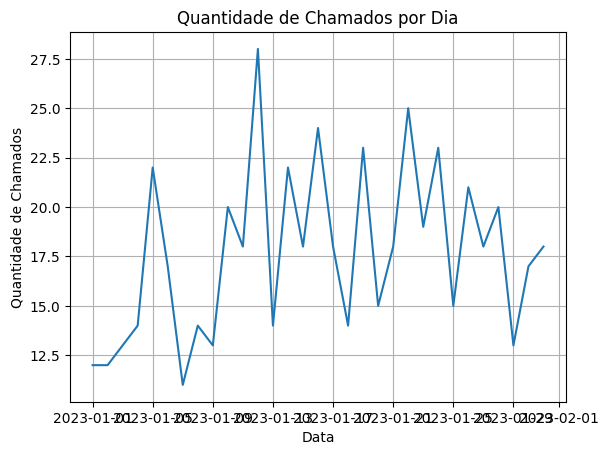

In [52]:
# Agrupar por mês e contar os incidentes
df_incidentes_por_mes = df_consolidado.groupby(df_consolidado['Abertura'].dt.to_period('M')).size()
print("\nIncidentes por mês:\n", df_incidentes_por_mes)

# Agrupar por dia e contar os incidentes
df_incidentes_por_dia = df_consolidado.groupby(df_consolidado['Abertura'].dt.date).size()
print("Incidentes por dia:\n", df_incidentes_por_dia)

df_incidentes_por_dia.plot(kind='line', title='Quantidade de Chamados por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.grid(True)
plt.show()

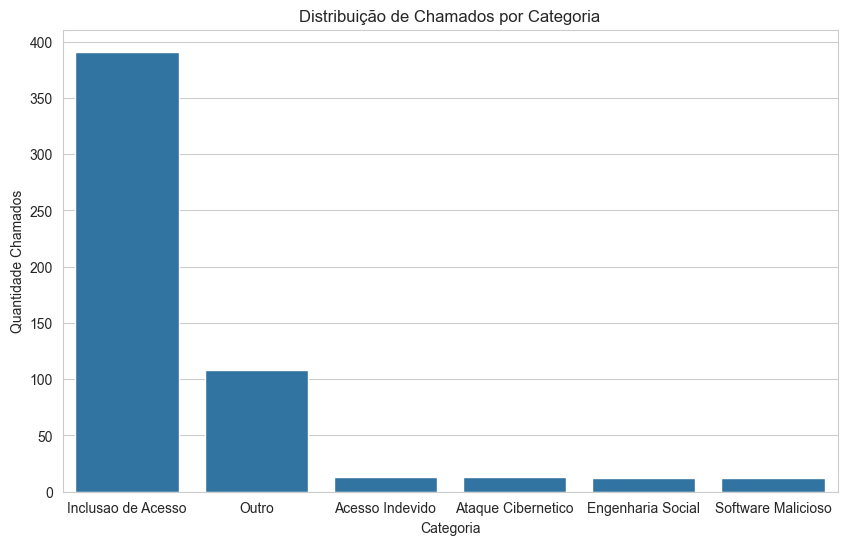

In [ ]:

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_consolidado, x='Categoria', palette='viridis', order=df_consolidado['Categoria'].value_counts().index)
plt.title('Distribuição de Chamados por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Chamados')
plt.show()


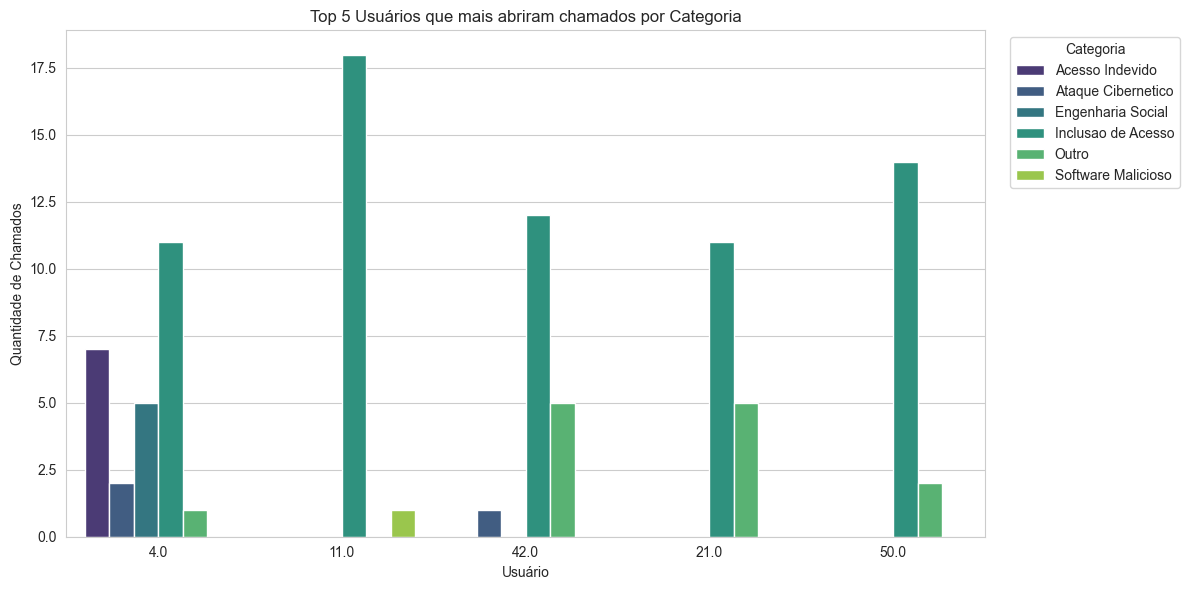

In [66]:


# 1) Agrupa por usuário e categoria
top_usuarios = (
    df_consolidado
    .groupby(['Codigo_Usuario', 'Categoria'])
    .size()
    .reset_index(name='qtd_chamados')
)


# 2) Total por usuário
totais = (
    top_usuarios.groupby('Codigo_Usuario')['qtd_chamados']
    .sum()
    .reset_index()
)

# 3) Seleciona top 5 usuários
top5_ids = totais.nlargest(5, 'qtd_chamados')['Codigo_Usuario']

# 4) Filtra somente esses usuários no DataFrame original de agregados
df_top5 = top_usuarios[top_usuarios['Codigo_Usuario'].isin(top5_ids)]

# 5) Ordena os usuários no eixo X pelo total de chamados
ordem_usuarios = (
    df_top5.groupby('Codigo_Usuario')['qtd_chamados']
    .sum()
    .sort_values(ascending=False)
    .index
)

# 6) Gráfico
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_top5,
    x='Codigo_Usuario',
    y='qtd_chamados',
    hue='Categoria',
    order=ordem_usuarios,
    palette='viridis'
)
plt.title('Top 5 Usuários que mais abriram chamados por Categoria')
plt.xlabel('Usuário')
plt.ylabel('Quantidade de Chamados')
plt.legend(title='Categoria', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
